In [47]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv('https://raw.githubusercontent.com/tina31726/Crime-Prediction/master/communities-crime-clean.csv')
data['highCrime'] = np.where(data['ViolentCrimesPerPop']>0.1, 1, 0)

In [48]:
data

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,...,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,0.02,1.0,0.46,0.77,0.23,0.38,0.22,0.16,0.22,0.42,0.29,0.29,0.27,0.16,0.24,0.38,0.26,0.01,0.14,0.27,0.37,0.39,0.12,0.69,0.27,0.37,0.32,...,0.17,0.21,0.65,0.64,0.56,0.82,0.10,0.22,0.5,0.01,0.85,0.82,0.00,0.26,0.83,0.13,0.66,0.16,0.15,0.13,0.13,0.23,0.25,0.28,0.19,0.18,0.25,0.00,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,0
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,0.00,0.0,0.15,0.33,0.13,0.27,0.65,0.41,0.45,0.21,0.22,0.29,0.15,0.00,0.29,0.00,0.14,0.02,0.45,0.57,0.70,0.21,0.27,0.43,1.00,0.17,0.93,...,0.19,0.18,0.43,0.43,0.42,0.58,0.17,0.46,0.5,0.02,0.73,0.58,0.18,0.40,0.56,0.55,0.48,0.06,0.06,0.08,0.02,0.07,0.08,0.09,0.20,0.16,0.36,0.00,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,1
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,0.04,1.0,0.12,0.32,0.19,0.28,0.67,0.52,0.57,0.18,0.21,0.35,0.15,0.26,0.18,0.84,0.33,0.06,0.65,0.48,0.58,0.28,0.79,0.22,0.44,0.43,0.54,...,0.25,0.22,0.36,0.34,0.41,0.50,0.13,0.51,0.5,0.07,0.56,0.52,0.31,0.60,0.40,0.55,0.33,0.05,0.07,0.09,0.02,0.09,0.13,0.13,0.41,0.38,0.47,0.01,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,1
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,0.00,0.0,0.23,0.43,0.48,0.36,0.53,0.41,0.44,0.29,0.27,0.30,0.18,0.19,0.20,0.00,0.80,0.02,0.38,0.51,0.59,0.32,0.37,0.43,0.64,0.30,0.52,...,0.19,0.18,0.38,0.43,0.32,0.58,0.12,0.45,0.5,0.03,0.66,0.55,0.18,0.26,0.58,0.42,0.41,0.10,0.10,0.12,0.08,0.14,0.15,0.15,0.24,0.17,0.33,0.00,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,1
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,0.05,1.0,0.02,0.77,0.57,0.47,0.13,0.11,0.16,0.32,0.17,0.19,0.16,0.07,0.21,0.14,0.22,0.11,1.00,0.18,0.18,0.82,0.42,0.23,0.19,1.00,0.25,...,0.14,0.07,0.25,0.41,0.22,0.24,0.14,0.71,0.0,0.06,0.66,0.21,0.07,0.24,0.77,0.27,0.10,0.16,0.16,0.18,0.18,0.21,0.26,0.21,1.00,0.16,0.24,0.00,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,56,Gillettecity,9,0.01,0.53,0.00,0.96,0.02,0.06,0.47,0.49,0.25,0.09,0.00,0.0,0.39,0.88,0.87,0.42,0.13,0.17,0.11,0.40,0.29,0.28,0.05,0.10,0.21,0.45,0.27,0.01,0.25,0.08,0.17,0.28,0.31,0.74,0.00,0.39,0.50,...,0.22,0.21,0.56,0.66,0.39,0.61,0.10,0.44,0.5,0.04,0.50,0.56,0.09,0.56,0.79,0.27,0.48,0.13,0.13,0.12,0.21,0.22,0.24,0.20,0.17,0.19,0.54,0.01,0.00,0.01,0.32,0.34,0.56,0.55,0.04,0.11,0.11,0.0,0.15,1
1989,56,GreenRivercity,9,0.00,0.67,0.01,0.91,0.03,0.21,0.56,0.46,0.24,0.12,0.00,0.0,0.47,0.80,0.17,0.43,0.22,0.23,0.20,0.43,0.26,0.26,0.43,0.22,0.15,0.30,0.36,0.01,0.18,0.14,0.28,0.24,0.31,0.58,0.29,0

In [49]:
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,...,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,5.496237,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,0.064104,0.696618,0.361259,0.558314,0.291540,0.495780,0.471044,0.317546,0.479242,0.375805,0.350336,0.368073,0.291169,0.203567,0.322333,0.284742,0.386157,0.055509,0.302750,0.315695,0.383251,0.361711,0.363281,0.501229,0.396427,0.440552,0.391234,0.441305,...,0.267602,0.251897,0.462132,0.494496,0.404064,0.562619,0.186272,0.495203,0.314601,0.076829,0.719649,0.548685,0.204476,0.433211,0.494235,0.264355,0.242905,0.264792,0.263593,0.269037,0.346553,0.372614,0.423121,0.384240,0.490070,0.449759,0.403638,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983,0.627195
std,16.401661,2.872650,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,0.128280,0.444648,0.209327,0.182820,0.204155,0.178067,0.173616,0.221951,0.167606,0.198224,0.191118,0.186848,0.171607,0.164793,0.195457,0.191008,0.183045,0.127973,0.228202,0.213354,0.202528,0.209239,0.201916,0.173940,0.202427,0.175490,0.198971,0.186332,...,0.196616,0.190756,0.169588,0.157935,0.189343,0.197134,0.210009,0.172550,0.255212,0.150501,0.194021,0.185251,0.217812,0.188952,0.232511,0.242846,0.206232,0.224434,0.231555,0.235273,0.219240,0.209213,0.248249,0.213369,0.169524,0.187321,0.192476,0.102630,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043,0.483672
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [50]:
data.shape

(1993, 105)

In [51]:
data.info

<bound method DataFrame.info of       state      communityname  ...  ViolentCrimesPerPop  highCrime
0         1      Alabastercity  ...                 0.06          0
1         1  AlexanderCitycity  ...                 0.14          1
2         1       Annistoncity  ...                 1.00          1
3         1         Athenscity  ...                 0.23          1
4         1         Auburncity  ...                 0.15          1
...     ...                ...  ...                  ...        ...
1988     56       Gillettecity  ...                 0.15          1
1989     56     GreenRivercity  ...                 0.06          0
1990     56        Laramiecity  ...                 0.12          1
1991     56    RockSpringscity  ...                 0.27          1
1992     56       Sheridancity  ...                 0.06          0

[1993 rows x 105 columns]>

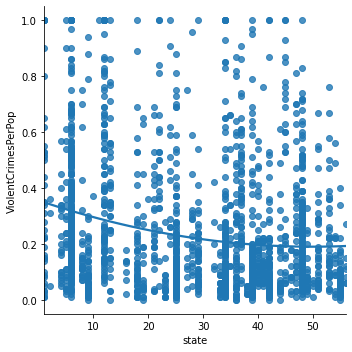

In [52]:
import seaborn as sns
sns.lmplot(x ="state", y ="ViolentCrimesPerPop", data = data, order = 2, ci = None)

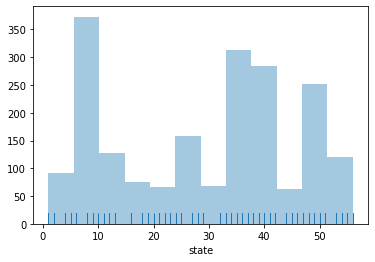

In [53]:
sns.distplot(data['state'], kde=False, rug=True);

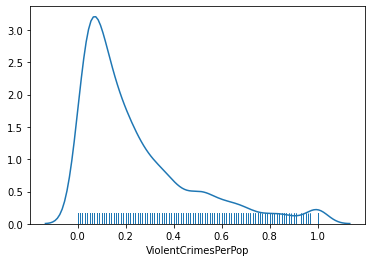

In [54]:
sns.distplot(data['ViolentCrimesPerPop'], hist=False, rug=True);

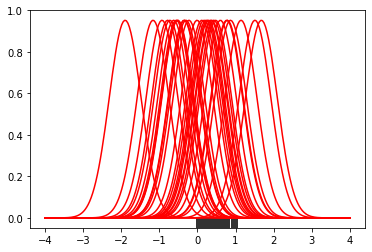

In [55]:
import numpy as np
from scipy import stats
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(data['population'], color=".2", linewidth=3);

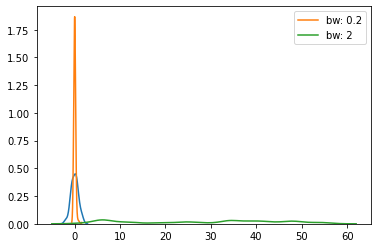

In [56]:
sns.kdeplot(x)
sns.kdeplot(data['population'], bw=.2, label="bw: 0.2")
sns.kdeplot(data['state'], bw=2, label="bw: 2")
plt.legend();

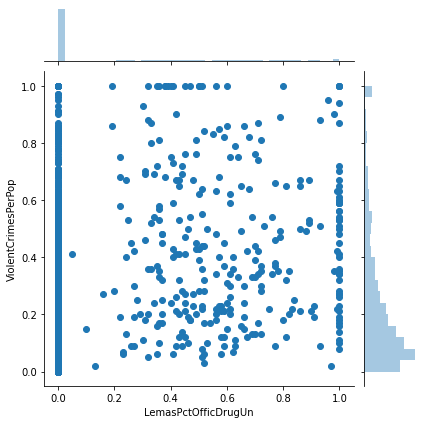

In [57]:
sns.jointplot(x="LemasPctOfficDrugUn", y="ViolentCrimesPerPop", data=data);

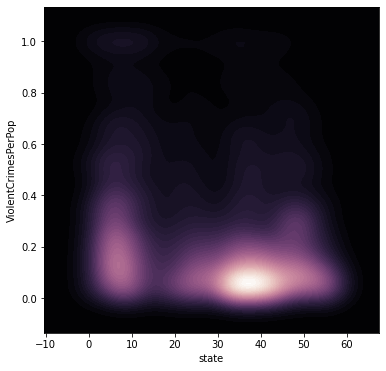

In [58]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(data['state'], data['ViolentCrimesPerPop'], cmap=cmap, n_levels=60, shade=True);

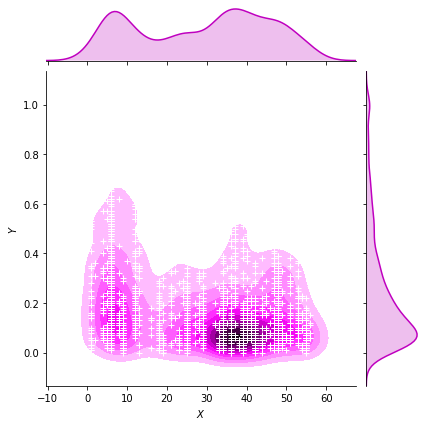

In [59]:
g = sns.jointplot(x="state", y="ViolentCrimesPerPop", data=data, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [60]:
pos=data[(data['highCrime'] == 1)]
pos_percentage=len(pos)/len(data)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


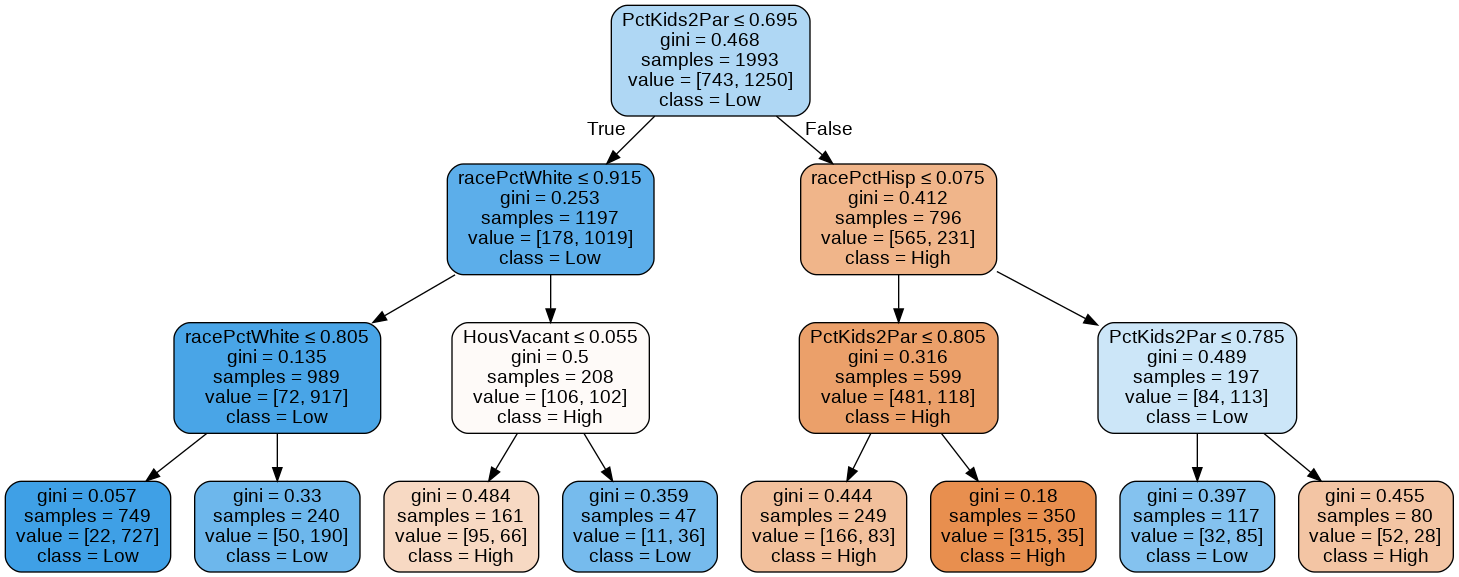

In [63]:

from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('https://raw.githubusercontent.com/tina31726/Crime-Prediction/master/communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = data['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [64]:
from sklearn.model_selection import cross_val_score
fold=data['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())

cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648
cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686
cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [65]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


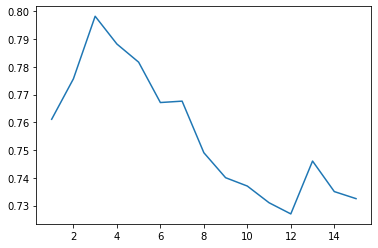

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7882361809045226, 0.7816959798994974, 0.7671457286432161, 0.7676457286432161, 0.7490628140703518, 0.7400577889447237, 0.7370427135678392, 0.7310276381909547, 0.7270050251256281, 0.7460603015075378, 0.7350552763819096, 0.7325100502512563]


In [66]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [67]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [34  5  3 44]
4_max_normalized_feature is  [0.02320617 0.05030207 0.08881686 0.3620976 ]
34
feature_name[index] is  PctEmplManu
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])
from sklearn.model_selection import cross_val_score
fold=data['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())






mislabel num is  442
ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv
cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.7

In [74]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression(normalize=True)
Y = data['ViolentCrimesPerPop']
predicted = cross_val_predict(lr, initial, Y, cv=10)
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))
y_pred = lr.fit(initial, Y).predict(initial)

print('MSE on training set is ',mean_squared_error(Y, y_pred))

# print('coef is ',lr.coef_)

min=np.min(lr.coef_)
print('min is ',min)
index_min = np.argmin(lr.coef_)
print(index_min)
max=np.max(lr.coef_)
print('max is ',max)
index_max = np.argmax(lr.coef_)
print(index_max)
print('coefficient[min] is ',feature_name[index_min])

print('coefficient[max] is ',feature_name[index_max])

10_fold_cv_MSE is  0.020102698466732363
MSE on training set is  0.016516774880307176
min is  -0.6756944788028533
67
max is  0.6350881164986153
64
coefficient[min] is  PctPersOwnOccup
coefficient[max] is  PersPerOccupHous


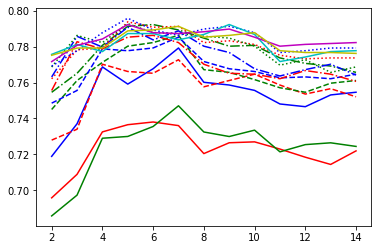

In [86]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

data['highCrime'] = np.where(data['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('https://raw.githubusercontent.com/tina31726/Crime-Prediction/master/communities-crime-clean.csv')
Y = data['highCrime']
fold=data['fold']
state=data['state']
community=data['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()


In [87]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_

array([[-2.04052546e-02,  9.75132690e-03, -1.28371329e-01,
         1.23044608e-01,  6.52084194e-02, -6.14280591e-02,
        -4.72820587e-02, -4.60121765e-02, -4.71777648e-02,
        -3.46626378e-02, -1.56537431e-02,  1.52570830e-01,
         1.88492101e-01,  1.03286139e-01, -7.18548440e-03,
         1.48691465e-01, -6.12543207e-02, -1.73401439e-01,
         4.48956257e-03,  1.79662679e-01,  1.61193740e-01,
         1.40327609e-01,  1.07194806e-01,  4.39239209e-02,
         8.19922061e-02,  7.74816512e-02,  1.13058167e-01,
        -3.97531389e-02, -1.91357751e-01, -1.50661446e-01,
        -1.59431939e-01,  1.42844505e-01, -1.52692314e-01,
         1.10214847e-01, -2.33208904e-02,  1.61083945e-02,
        -1.34972468e-01,  1.35500286e-01, -1.06437345e-01,
        -4.01754009e-02, -1.01677202e-01, -1.09737150e-01,
        -1.29668589e-02,  1.62749424e-01,  1.68736871e-01,
         1.78676474e-01,  1.33751535e-01, -1.18987095e-02,
         1.12613742e-02, -3.11151955e-02, -1.50870947e-0

In [88]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 86.36363636363636
Accuracy is 83.44204716507777
Precision is 89.31623931623932
Recall is 83.6


In [89]:

scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 77.91884422110552
Cross validation precision is 84.69052370865853
Cross validation recall is 79.67999999999999


In [90]:

feature_name=list(initial)

ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])

ind is  [83 84 80 19 45 44 81 82 85 12]
10_max_vector_components is  [0.16356539 0.19320424 0.16436957 0.17966268 0.17867647 0.16873687
 0.16398596 0.16706879 0.16710099 0.1884921 ]
83
vector_component[index] is  RentMedian
84
vector_component[index] is  RentHighQ
80
vector_component[index] is  OwnOccMedVal
19
vector_component[index] is  medFamInc
45
vector_component[index] is  PctYoungKids2Par
44
vector_component[index] is  PctKids2Par
81
vector_component[index] is  OwnOccHiQuart
82
vector_component[index] is  RentLowQ
85
vector_component[index] is  MedRent
12
vector_component[index] is  medIncome


In [93]:

data['highCrime'] = np.where(data['ViolentCrimesPerPop']>0.1, 1, 0)
Y = data['highCrime']
fold=data['fold']

In [94]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(initial, Y)
        scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

average is  0.23798294029101857
Q1(25%) is  0.07
median is  0.15
Q3(75%) is  0.33
average between Q3 and Q1 is  0.2


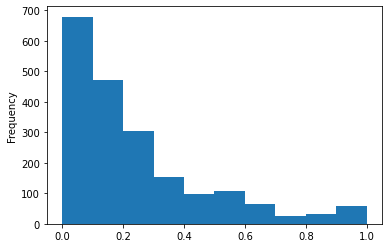

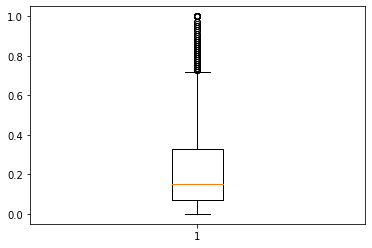

In [96]:

data['ViolentCrimesPerPop'].plot.hist()
print('average is ',np.average(data['ViolentCrimesPerPop']))
Q1, median, Q3 = np.percentile(data['ViolentCrimesPerPop'], [25, 50, 75])
print("Q1(25%) is ",Q1)
print("median is ",median)
print("Q3(75%) is ",Q3)
print("average between Q3 and Q1 is ",(Q3+Q1)/2)
plt.show()
plt.boxplot(data['ViolentCrimesPerPop'])
plt.show()

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# Using RidgeCV to reduce the amount of verfitting
ridge_model = RidgeCV(alphas=[10.0,1.0,0.1, 0.01, 0.001])
print(ridge_model)
ridge_reg_score = cross_val_predict(ridge_model, initial, Y, cv=10)
ridge_fit = ridge_model.fit(initial, Y)
#To get the best alpha
print('Best Alpha: ', ridge_model.alpha_)
ridge_predict = ridge_model.predict(initial)
#accuracy of each Fold
print(ridge_reg_score)
#mean accuracy of 10 Folds
print(ridge_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is: ',mean_squared_error(Y, ridge_reg_score))

#MSE on the Training set
mse_ridge = np.mean((ridge_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_ridge)

RidgeCV(alphas=array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)
Best Alpha:  1.0
[0.15629536 0.29723509 0.52328122 ... 0.09344901 0.16300833 0.16714695]
0.23708242110392747
10_fold_cv_MSE is:  0.01980395252878226
Mean Square Error on training set:  0.016763529155169314


In [77]:
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2)
print(pol)

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)])
poly_reg_score = cross_val_predict(pip, initial, Y, cv=10)
p_fit = pip.fit(initial, Y)
p_predict = pip.predict(initial)
#accuracy of each fold
print(poly_reg_score)
#mean accuracy of 10 Folds
print(poly_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is ',mean_squared_error(Y, poly_reg_score))

#MSE on Training Set
mse_poly = np.mean((p_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_poly)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')
[ 0.54689201  0.53205401  0.32257981 ... -0.19225602  0.17292615
  0.40110655]
0.23572305638573585
10_fold_cv_MSE is  0.12995768875828795
Mean Square Error on training set:  3.082915650033015e-29
